# Article ArchPy exemple

This notebook presents the syntetical case of the ArchPy article

In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys

sys.path.append("../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [2]:
PB = Pile(name = "PB",seed=1)
P1 = Pile(name="P1",seed=1)

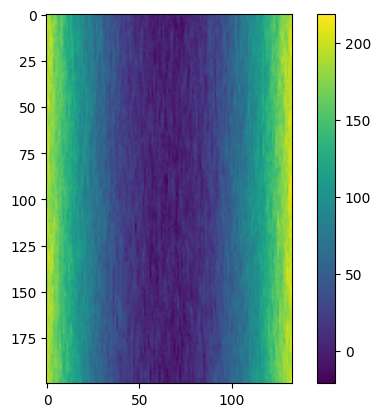

In [3]:
#grid
sx = 15
sy = 15
sz = 4
x1 = 2000
y1 = 3000
z1 = 201
x0 = 0
y0 = 0
z0 = 0
nx = int((x1-x0)/sx)
ny = int((y1-y0)/sy)
nz = int((z1-z0)/sz)

xg = np.linspace(x0,x1,nx+1)
yg = np.linspace(y0,y1,ny+1)
zg = np.linspace(z0,z1,nz+1)
sx = xg[1] - xg[0]
sy = yg[1] - yg[0]
sz = zg[1] - zg[0]

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)

top = 201

X,Y = np.meshgrid((xg+sx/2)[:-1],(yg+sy/2)[:-1])
cm = gcm.CovModel2D(elem=[("exponential",{"w":50,"r":[20,300]})])

#bot
c = (x1-x0)/5
bot = (z1/1.8)*np.sin(X/c+2.15)+(z1/1.8)
bot = geone.grf.grf2D(cm,(nx,ny),(sx,sy),(x0,y0),mean = bot)[0]

#bot 2
bot2 = ((X-xg[int(nx/2)])**2)
bot2 /= np.max(bot2)
bot2 *= 200
bot2 = geone.grf.grf2D(cm,(nx,ny),(sx,sy),(x0,y0),mean = bot2)[0]
plt.imshow(bot2)
plt.colorbar()

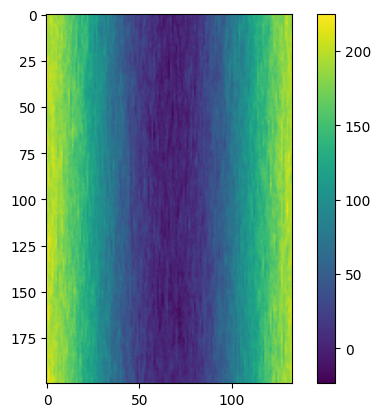

In [4]:
plt.imshow(bot)
plt.colorbar()

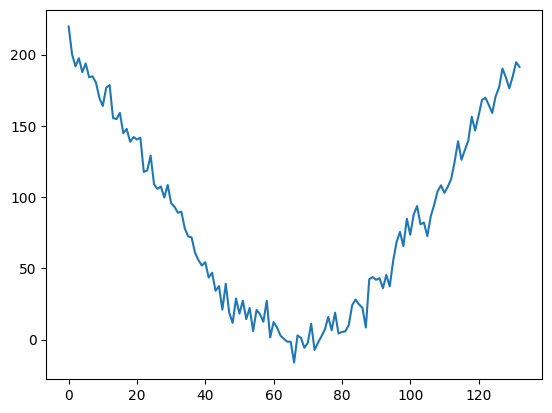

In [5]:
plt.plot(bot[25,:])

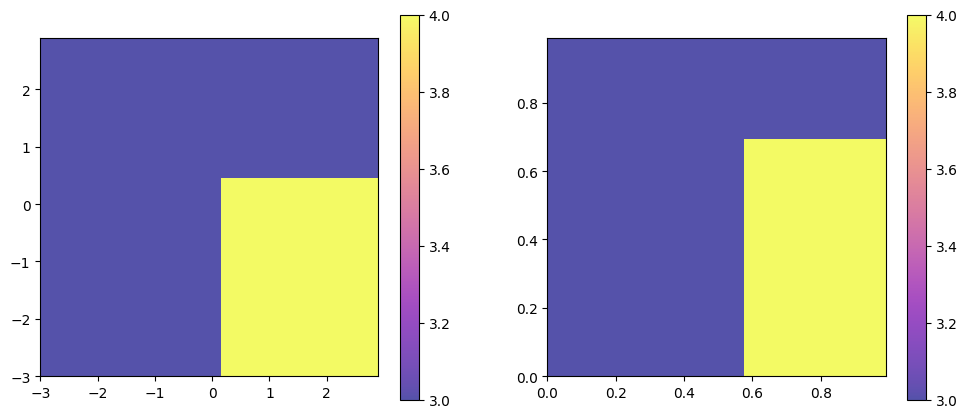

In [6]:
## setup TPGs for B units

#flag
t2g1 = -0.3
t3g1 = .2
t1g2 = -0
t2g2 = 0.5
dic4 = [[(t3g1,np.inf),(-np.inf,t2g2)]] #where facies 4 is present
dic3 = [[(-np.inf,t3g1),(-np.inf,np.inf)],[(t3g1,np.inf),(t2g2,np.inf)]]#where facies 3 is present

flag = {4:dic4,
        3:dic3}

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_flag(flag,alpha=.7)

plt.subplot(1,2,2)
plot_flag(Gspace2Pspace(flag),alpha=.7)

## G_cm
G1 = gcm.CovModel3D(elem=[("cubic",{"w":1.,"r":[200,200,30]})],name="G1")
G2 = gcm.CovModel3D(elem=[("cubic",{"w":1.,"r":[200,200,30]})],name="G2",alpha=30,beta=10)
G_cm = [G1,G2]

In [7]:
# TIs setup, modify values to match with facies

TI_D = "../../data/TIs/channels3D/ti_channels3D_4f_200x100x22.vtk"
TI_D = gcm.img.readImageVtk(TI_D)
TI_D.val = Arr_replace(TI_D.val,{0:3,1:4,2:1,3:2})
imgplt3.drawImage3D_surface(TI_D, excludedVal=[3])
TI_B3 = "../../data/TIs/channels3D_strebelle/ti_channels_strebelle3D_125x125x21.vtk"
TI_B3 = gcm.img.readImageVtk(TI_B3)
TI_B3.val = Arr_replace(TI_B3.val,{0:3,1:2})
imgplt3.drawImage3D_surface(TI_B3, excludedVal=[3])

Widget(value='<iframe src="http://localhost:53683/index.html?ui=P_0x26688103290_0&reconnect=auto" class="pyvis…

Widget(value='<iframe src="http://localhost:53683/index.html?ui=P_0x26688181690_1&reconnect=auto" class="pyvis…

In [8]:
p3_min = 0.1
p3_max = 0.35
p0_min = 0.05
p0_max = 0.15

In [9]:
Z,Y,X = np.meshgrid(zg[:-1],yg[:-1],xg[:-1],indexing='ij')

In [10]:
p3 = (Y/Y.max())*(p3_max-p3_min)+p3_min
p3[:,:50,:50] = 0
p3[:,:50,90:] = 0
p1 = 0.8*p3.copy()
p0 = (Y/Y.max())*(p0_max-p0_min)+p0_min
p0[:,:50,:50] = 0
p0[:,:50,90:] = 0
p2 = 1 - p0 - p1 - p3

nclass= 4
local_pdf = np.zeros((nclass,nz,ny,nx))
local_pdf[0] = p0
local_pdf[1] = p1
local_pdf[2] = p2
local_pdf[3] = p3

In [11]:
arr = local_pdf[2]
im = geone.img.Img(nx,ny,nz,sx,sy,sz,x0,y0,z0,nv=1,val=arr)
imgplt3.drawImage3D_surface(im)

Widget(value='<iframe src="http://localhost:53683/index.html?ui=P_0x26689464710_2&reconnect=auto" class="pyvis…

## Define and setup units

In [12]:
## Surfaces covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':100, 'r':[500,1000]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':100, 'r':[500,1000]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':100, 'r':[600,800]})])
covmodelA = gcm.CovModel2D(elem=[('spherical', {'w':200, 'r':[600,3000]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':200, 'r':[800,800]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[100,100,30]})],alpha=0,name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[300,300,30]})],alpha=0,name="vario_SIS") # input variogram
lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the facies dictionary 
cm_SIS_A = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[150,150,30]})],alpha=0,name="vario_SIS")

#create Lithologies 
dic_s_D = {"int_method" : "kriging","covmodel" : covmodelD}
dic_f_D = {"f_method" : "MPS","TI":TI_D,"xr":0.5,"yr":0.5,"zr":1,"maxscan":0.1,"thresh":0.1,
           "rot_usage":1,"rotAzi":90,"neig":15,"probability":(0.28,0.27,0.35,0.1),"localPdf":local_pdf,"probaUsage":2}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC}
dic_f_C = {"f_method" : "TPGs","Flag" : flag,"G_cm":G_cm,"grf_method":"sgs"}
C = Unit(name="C",order=2,ID = 2,color="midnightblue",contact="onlap",dic_facies=dic_f_C,surface=Surface(dic_surf=dic_s_C,contact="erode"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB}
dic_f_B = {"f_method":"SubPile","SubPile":PB}
B = Unit(name="B",order=3,ID = 3,color="green",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="erode",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel" : covmodelA}
dic_f_A = {"f_method":"SIS","neig":10,"f_covmodel":cm_SIS_A,"probability":(0.1,0.9)}
A = Unit(name="A",order=5,ID = 5,color="lightcoral",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

#Subpile
# PB
ds_B3 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B3 = {"f_method":"MPS","TI":TI_B3,"xr":0.5,"yr":0.5,"zr":1,"rotAzi":90,
         "rot_usage":1,"neig":20,"maxscan":0.15,"thresh":0.02,
         "anisotropyRatioMode":"manual","ax":1,"ay":1,"az":1,"probability":(0.5,0.5),"probaUsage":1}
B3 = Unit(name = "B3",order=1,ID = 6,color="forestgreen",surface=Surface(dic_surf=ds_B3,contact="onlap"),dic_facies=df_B3)

ds_B2 = {"int_method":"grf_ineq","covmodel":covmodel_er}
df_B2 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_B2}
B2 = Unit(name = "B2",order=2,ID = 7,color="limegreen",surface=Surface(dic_surf=ds_B2,contact="erode"),dic_facies=df_B2)

ds_B1 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B1 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_B2}
B1 = Unit(name = "B1",order=3, ID = 8,color="palegreen",surface=Surface(dic_surf=ds_B1,contact="onlap"),dic_facies=df_B1)

## Subpile
PB.add_unit([B3,B2,B1])

Unit D: TI added
Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: covmodel for SIS added
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added
Unit B3: TI added
Unit B3: Surface added for interpolation
Unit B2: covmodel for SIS added
Unit B2: Surface added for interpolation
Unit B1: covmodel for SIS added
Unit B1: Surface added for interpolation
Stratigraphic unit B3 added
Stratigraphic unit B2 added
Stratigraphic unit B1 added


In [13]:
B.get_baby_units()

[]

## Facies and properties

In [14]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[200,200,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[100,100,10]})],alpha=0,name="K_vario_2")
covmodelPoro = gcm.CovModel3D(elem=[("exponential",{"w":0.005,"r":[200,200,20]})],alpha=0,name="poro_vario")

Sand = Facies(ID = 1,name="Sand",color="yellow")
Gravel = Facies(ID = 2,name="Gravel",color="lightgreen")
Clay = Facies(ID = 3,name="Clay",color="blue")
Silt = Facies(ID = 4,name="Silt",color="goldenrod")

A.add_facies([Gravel,Silt])
B3.add_facies([Clay,Gravel])
B2.add_facies([Silt,Sand])
B1.add_facies([Gravel,Sand])
D.add_facies([Clay,Gravel,Sand,Silt])
C.add_facies([Clay,Silt])

permea = Prop("K",[Clay,Sand,Gravel,Silt],
                  [covmodelK2,covmodelK,covmodelK2,covmodelK],
                  means=[-8,-3.5,-2.5,-5.5],
                  int_method = ["sgs","sgs","sgs","sgs"],
                  def_mean=-5)
poro = Prop("Porosity",
            [Clay,Sand,Gravel,Silt],
            [covmodelPoro,covmodelPoro,covmodelPoro,covmodelPoro],
             means = [0.2,0.3,0.4,0.2],
             int_method = ["homogenous","sgs","sgs","sgs"],
             def_mean=0.3,vmin=0.0)

Facies Gravel added to unit A
Facies Silt added to unit A
Facies Clay added to unit B3
Facies Gravel added to unit B3
Facies Silt added to unit B2
Facies Sand added to unit B2
Facies Gravel added to unit B1
Facies Sand added to unit B1
Facies Clay added to unit D
Facies Gravel added to unit D
Facies Sand added to unit D
Facies Silt added to unit D
Facies Clay added to unit C
Facies Silt added to unit C


In [15]:
#We must create an ArchTable object and set a Pile master (first pile)
T1 = Arch_table(name = "P1",seed=1, working_directory = "ws_article") #working directory is for saving and loading I/O files
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top*np.ones([ny,nx]),bot=bot2) #add grid
T1.rem_all_bhs()
T1.add_prop([permea,poro])

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
boreholes removed
Property K added
Property Porosity added


In [16]:
#load boreholes data

l_bhs = pd.read_csv("ws_article/P1.lbh") #boreholes list
db, l_bhs = ArchPy.inputs.load_bh_files(pd.read_csv("ws_article/P1.lbh"), pd.read_csv("ws_article/P1.fd"), pd.read_csv("ws_article/P1.ud"), altitude=True)
boreholes = ArchPy.inputs.extract_bhs(db, l_bhs, T1)
T1.add_bh(boreholes)

Borehole 1 added
Borehole 2 added
Borehole 3 goes below model limits, borehole 3 depth cut
Borehole 3 added
Borehole 4 goes below model limits, borehole 4 depth cut
Borehole 4 added
Borehole 5 added
Borehole 6 added
Borehole 7 added
Borehole 8 added
Borehole 9 added
Borehole 10 added
Borehole 11 goes below model limits, borehole 11 depth cut
Borehole 11 added
Borehole 12 added
Borehole 13 added
Borehole 14 added
Borehole 15 goes below model limits, borehole 15 depth cut
Borehole 15 added
Borehole 16 added
Borehole 17 goes below model limits, borehole 17 depth cut
Borehole 17 added
Borehole 18 goes below model limits, borehole 18 depth cut
Borehole 18 added
Borehole 19 goes below model limits, borehole 19 depth cut
Borehole 19 added
Borehole 20 goes below model limits, borehole 20 depth cut
Borehole 20 added


In [17]:
T1.plot_bhs(plot_bot=True,plot_top=True)

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17bfcd48090_3&reconnect=auto' style='width…

In [18]:
#extract hard data from boreholes
T1.process_bhs()

##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n
Pile PB: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set

 ## Computing distributions for Normal Score Transform ##

Processing ended successfully


## Ready for the simulations


### Surfaces and units first

In [19]:
T1.compute_surf(2, fl_top=True)

########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.3341064453125 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.14261817932128906 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.14760541915893555 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.15358853340148926 s

#### COMPUTING SURFACE OF UNIT A


\\home\schorppl$\GitHub\ArchPy\examples\03_Article_example\../..\ArchPy\base.py:3602: RuntimeWarning: invalid value encountered in cast
  idx_s2=(np.round((s2-z0)/sz)).astype(int)
\\home\schorppl$\GitHub\ArchPy\examples\03_Article_example\../..\ArchPy\base.py:3601: RuntimeWarning: invalid value encountered in cast
  idx_s1=(np.round((s1-z0)/sz)).astype(int)


A: time elapsed for computing surface 0.3001997470855713 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.22041058540344238 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.1545870304107666 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.17553091049194336 s
##########################

########## PILE PB ##########
Pile PB: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT B1
B1: time elapsed for computing surface 0.18051695823669434 s

#### COMPUTING SURFACE OF UNIT B2
B2: time elapsed for computing surface 0.17054462432861328 s

#### COMPUTING SURFACE OF UNIT B3
B3: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.15558815002441406 s

#### COMPUTING SURFACE OF UNIT B1
B1: time elapsed for computing surface 0.1770312786102295 s

#### COMPUTING SURFACE OF UNIT B2
B2: time elapsed for com

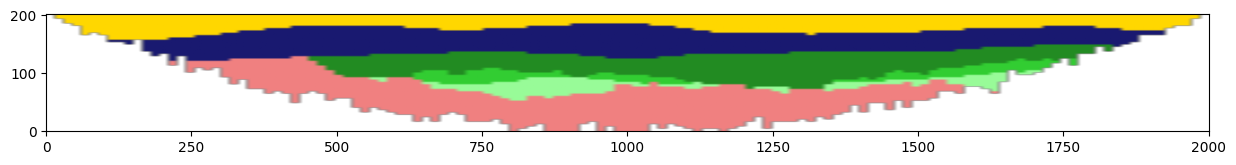

In [20]:
plt.figure(figsize=(15,5))
plt.imshow(T1.get_units_domains_realizations(fill="color")[0,:,60,:],origin="lower",extent=[x0,x1,z0,z1])

In [21]:
#set default params for Pyvista
ntbk = True

In [22]:
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 0
T1.plot_units(iu,v_ex=3,plotter=p,slicex=(0.5),slicey=(0.94,0.5,0.13),slicez=0.2,h_level=2)
T1.plot_bhs(plotter=p,v_ex=3)

p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 1
T1.plot_units(iu,v_ex=3,plotter=p,slicex=(0.5),slicey=(0.94,0.5,0.13),slicez=0.2,h_level=2)
T1.plot_bhs(plotter=p,v_ex=3)

p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17b92be2b50_4&reconnect=auto' style='width…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17b92932f50_5&reconnect=auto' style='width…

In [23]:
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 0
T1.plot_units(iu,v_ex=3,plotter=p,slicex=(0.5),slicey=(0.94,0.5,0.13),slicez=0.2,h_level=2)
T1.plot_bhs(plotter=p,v_ex=3)

p.camera_position = 'yz'
p.camera.azimuth = 0
p.camera.elevation=0
p.camera.zoom(1.2)
p.show()

p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 1
T1.plot_units(iu,v_ex=3,plotter=p,slicex=(0.5),slicey=(0.94,0.5,0.13),slicez=0.2,h_level=2)
T1.plot_bhs(plotter=p,v_ex=3)

p.camera_position = 'yz'
p.camera.azimuth = 0
p.camera.elevation= 0
p.camera.zoom(1.2)
p.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17b92e78c50_6&reconnect=auto' style='width…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17bfccaa350_7&reconnect=auto' style='width…

In [24]:
#plot volume
T1.plot_units(0, v_ex=3)

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17bfccb7d50_8&reconnect=auto' style='width…

In [25]:
T1.plot_proba(A,v_ex=3,filtering_interval=[0.01,1],slicex=(),slicey=(0.1,0.4,0.7))

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17b92b0f3d0_9&reconnect=auto' style='width…

In [27]:
T1.compute_facies(1)


### Unit D: facies simulation with MPS method ####
[Clay, Gravel, Sand, Silt] MPS
### Unit D - realization 0 ###
### Unit D - realization 1 ###
Time elapsed 66.24 s

### Unit C: facies simulation with TPGs method ####
[Clay, Silt] TPGs
### Unit C - realization 0 ###
### Unit C - realization 1 ###
Time elapsed 8.16 s

### Unit B: facies simulation with SubPile method ####
[Clay, Gravel, Silt, Sand] SubPile
SubPile filling method, nothing happened
Time elapsed 0.0 s

### Unit A: facies simulation with SIS method ####
[Gravel, Silt] SIS
### Unit A - realization 0 ###
### Unit A - realization 1 ###
Time elapsed 1.8 s

### Unit B3: facies simulation with MPS method ####
[Clay, Gravel] MPS
### Unit B3 - realization 0 ###
### Unit B3 - realization 1 ###
Time elapsed 136.16 s

### Unit B2: facies simulation with SIS method ####
[Silt, Sand] SIS
### Unit B2 - realization 0 ###
Some errors have been found 
Some facies were found inside units where they shouldn't be 

### List of errors ####
Fac

In [28]:
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 0
v_ex = 3
T1.plot_facies(iu,v_ex=v_ex,plotter=p,slicex=(0.5),slicey=(0.935,0.5,0.13),slicez=0.2)
T1.plot_bhs("facies",plotter=p,v_ex=v_ex)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 1
T1.plot_facies(iu,v_ex=v_ex,plotter=p,slicex=(0.5),slicey=(0.935,0.5,0.13),slicez=0.2)
T1.plot_bhs("facies",plotter=p,v_ex=v_ex)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()


Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17bc325fe50_10&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c0fbf5290_11&reconnect=auto' style='widt…

In [29]:
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 0
T1.plot_facies(iu,v_ex=v_ex,plotter=p)
T1.plot_bhs("facies",plotter=p,v_ex=v_ex)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 1
T1.plot_facies(iu,v_ex=v_ex,plotter=p)
T1.plot_bhs("facies",plotter=p,v_ex=v_ex)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c1f800cd0_12&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c1909d290_13&reconnect=auto' style='widt…

In [30]:
p = pv.Plotter(off_screen=True)
T1.plot_facies(0,v_ex=3,slicex=0.2,slicey=0.3,slicez=0.2,plotter=p)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=30
p.show()

p2 = pv.Plotter(off_screen=True)
T1.plot_units(0,3,slicex=0.2,slicey=0.3,slicez=0.2,plotter=p2)
p2.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c2533da50_14&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c2534f7d0_15&reconnect=auto' style='widt…

In [34]:
#We can also plot inside specific units
T1.plot_facies(inside_units=[B3],excludedVal=[3])

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c19209c90_18&reconnect=auto' style='widt…

In [35]:
T1.compute_prop(1)

### 2 K property models will be modeled ###
### 1 K models done
### 2 K models done
### 2 Porosity property models will be modeled ###
### 1 Porosity models done
### 2 Porosity models done


In [36]:
# for saving the project
ArchPy.inputs.save_project(T1)

Project saved successfully


True

In [37]:
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 0
v_ex = 3

T1.plot_prop("K",iu=iu,v_ex=v_ex,plotter=p,slicex=(0.5),slicey=(0.935,0.5,0.13),slicez=0.2)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 1
T1.plot_prop("K",iu=iu,v_ex=v_ex,plotter=p,slicex=(0.5),slicey=(0.935,0.5,0.13),slicez=0.2)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17bfaf52850_19&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c0421fc50_20&reconnect=auto' style='widt…

In [38]:
#poro
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 0
v_ex = 3

T1.plot_prop("Porosity",iu=iu,v_ex=v_ex,plotter=p,slicex=(0.5),slicey=(0.935,0.5,0.13),slicez=0.2,cmin=0.1)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()
p = pv.Plotter(off_screen = True,notebook=ntbk)
iu = 1
T1.plot_prop("Porosity",iu=iu,v_ex=v_ex,plotter=p,slicex=(0.5),slicey=(0.935,0.5,0.13),slicez=0.2,cmin=0.1)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c18e371d0_21&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c04054790_22&reconnect=auto' style='widt…

In [39]:
iu = 0

p = pv.Plotter(off_screen = True,notebook=ntbk)
T1.plot_prop("Porosity",iu,v_ex=3,plotter=p,cmin=0.1)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

iu = 1

p = pv.Plotter(off_screen = True,notebook=ntbk)
T1.plot_prop("Porosity",iu,v_ex=3,plotter=p,cmin=0.1)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c18e5f2d0_23&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c024411d0_24&reconnect=auto' style='widt…

In [40]:
iu = 0

p = pv.Plotter(off_screen = True,notebook=ntbk)
T1.plot_prop("K",iu,v_ex=3,plotter=p)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

iu = 1

p = pv.Plotter(off_screen = True,notebook=ntbk)
T1.plot_prop("K",iu,v_ex=3,plotter=p)
p.camera_position = 'yz'
p.camera.azimuth = 45
p.camera.elevation=20
p.camera.zoom(1.2)
p.show()

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c03f6c250_25&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:50809/index.html?ui=P_0x17c03f6cb10_26&reconnect=auto' style='widt…